In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
blogs=pd.read_csv("blogs.csv",encoding='utf-8',on_bad_lines='skip')
blogs

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


# Data Exploration and Preprocesing

In [4]:
blogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
blogs.shape

(2000, 2)

There are 2000 blogs in the dataset

In [7]:
blogs.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


# Duplicate Rows

In [9]:
blogs[blogs.duplicated(keep=False)]

,Data,Labels


##  No Duplicate Rows

# Nan Values

In [12]:
blogs.isnull().sum()

Data      0
Labels    0
dtype: int64

# Labels Column

In [14]:
blogs.Labels.nunique()

20

In [15]:
blogs.Labels.unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [16]:
blogs.Labels.value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

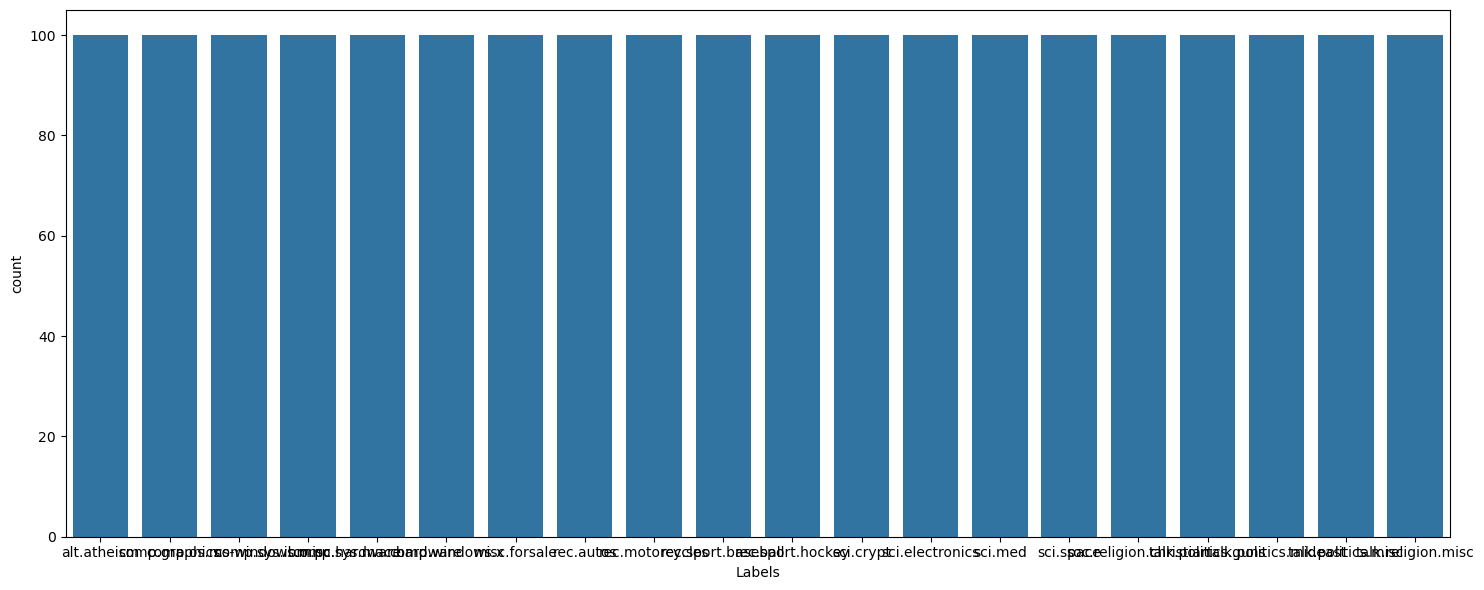

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(data=blogs,x="Labels")
plt.tight_layout()
plt.show()

# Preprocesing The Data

In [19]:
import spacy 
import string
import re

ModuleNotFoundError: No module named 'spacy'

In [ ]:
blogs.head()

#  Define a function to clean the Data

In [ ]:
def clean_text(text):

    text=text.lower()

    # removing any sort of special characters,digits and any punctuations etc

    text=re.sub('\[.*,?/]','',text)
    text=re.sub('[0-9" "]+','',text)
    text=re.sub(r'[^a-zA-Z\s]','',text)

    return text

clean =lambda x: clean_text(x)

In [ ]:
blogs['Data']=blogs['Data'].apply(clean)

In [ ]:
blogs['Data'].head()

# Tokenization

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
blogs['Data']=blogs['Data'].apply(word_tokenize)
blogs['Data'].head()

In [ ]:
blogs['Data']=pd.DataFrame(blogs['Data'])

# Removing The Stop Words

In [ ]:
import nltk 
from nltk.corpus import stopwords

In [ ]:
stop=stopwords.words('english')
blogs["Data"]=blogs["Data"].apply(lambda x : " ".join( x for x in x if x not in stop))

In [ ]:
blogs['Data']

# Stemming the Words

In [ ]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
blogs['Data']=[stemmer.stem(i) for i in blogs["Data"]]

In [ ]:
blogs.head()

# TFIDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word')

In [ ]:
bow_matrix = tfidf.fit_transform(blogs['Data'])

In [ ]:
bow_matrix.shape

In [ ]:
bow_matrix

# Naive Bayes For Text Classification

In [ ]:
from sklearn.model_selection import train_test_split
train_blogs,test_blogs=train_test_split(blogs,test_size=0.2)

In [ ]:
# Train data
train_blogs

In [ ]:
# Test Data
test_blogs

In [ ]:
print(train_blogs.shape)
print(test_blogs.shape)

In [ ]:
vectoriser = TfidfVectorizer(analyzer='word')

In [ ]:
# Bag of words matrix for train data using TfIdf Vectoriser

train_matrix= vectoriser.fit_transform(train_blogs['Data'])

In [ ]:
train_matrix 

In [ ]:
train_matrix.shape

In [ ]:
test_matrix = vectoriser.transform(test_blogs['Data'])

In [ ]:
test_matrix.shape

In [ ]:
X_train = train_matrix
y_train = train_blogs['Labels']

X_test = test_matrix
y_test = test_blogs['Labels']

In [ ]:
# Implementing classification model using Naive Bayes

from sklearn.naive_bayes import MultinomialNB as mb

classifier = mb()

In [ ]:
# training using train data

classifier.fit(X_train,y_train)

# Predictions

In [ ]:
train_preds = classifier.predict(train_matrix)

train_preds

In [ ]:
train_accuracy = np.mean(train_preds == train_blogs['Labels'])

print('The training accuracy is:',train_accuracy)

In [ ]:
# Here we are making predictions on the unseen data (Testing data)

test_preds = classifier.predict(test_matrix)

test_preds

In [ ]:
test_accuracy = np.mean(test_preds == test_blogs['Labels'])

print('The testing accuracy of the model is:',test_accuracy)

# Sentiment Analysis

In [ ]:
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer

# Using the vader lexicon library for sentiment analysis\
nltk.download('vader_lexicon')

In [ ]:
# creating a function to calculate sentiment 

def analyze_emotion(text):
    analyser = SentimentIntensityAnalyzer()
    
    score = analyser.polarity_scores(text)
    
    if score['compound']>= 0.5:
        sentiment = 'Positive'
    elif score['compound'] <= 0.5:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    
    return score,sentiment

In [ ]:
blogs['score'],blogs['Sentiment'] = zip(*blogs['Data'].apply(analyze_emotion))

In [ ]:
blogs

In [ ]:
blogs['Sentiment'].value_counts()

In [ ]:
from nrclex import NRCLex
text=' '.join(blogs['Data'])

In [ ]:
sentiment=NRCLex(text)
sentiment.affect_frequencies

In [ ]:
blogs

# distribution of sentiments across different categories

In [ ]:
category_sentiment=pd.crosstab(blogs['Labels'],blogs['Sentiment'])
category_sentiment

# Visualisation for distribution of sentiments across different categories

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x=category_sentiment.index,y=category_sentiment['Positive'])
plt.xlabel('Categories')
plt.title('Positive Sentiments')
plt.xticks(rotation=80)

plt.subplot(1,2,2)
sns.barplot(data =category_sentiment,x =category_sentiment.index,y = 'Negative')
plt.xlabel('Categories')
plt.title('Negative Sentiments')
plt.xticks(rotation=80)

# Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
accuracy = accuracy_score(test_preds,test_blogs['Labels'])

print('The Accuracy of the model is:',accuracy)

In [ ]:
precision = precision_score(test_preds , test_blogs['Labels'],average='macro')

print('Precision of the model is:',precision)

In [ ]:
recall = recall_score(test_preds,test_blogs['Labels'],average = 'macro')

print('Recall of the model is',recall)

In [ ]:
F1_score = f1_score(test_preds , test_blogs['Labels'],average='macro')

print('F1 score of the model is:',F1_score)

We got testing accuracy for text prediction around 84 %. All the evaluation metrics such as accuracy, precision and F1 score etc are around same which indicates significance in classification.

The sentiment analysis on the blogs resulted in Positive and Negative sentiments. There were no neutral sentiments inany of the blogs. In that too majority portion of the blogs had negative sentiment in it when compared to positive ones. This indicates that the content of the blog posts majorly had negative feeling or emotions of any unpleasant sentiments.